These exercises are intended to accompany our book [Fundamentals of Data Analytics](https://link.springer.com/book/10.1007/978-3-030-56831-3). The coarse is an elemantry introduction to machine learning with no need for and background except some familiarity with basic linear algebra and probability.


# MNIST Dataset 


## MNIST Dataset Description

The Modified National Institute of Standards and Technology dataset, shortly called MNIST dataset is commonly used for benchmarking purpose in machine learning research. Note that MNIST is not always the best dataset for testing the ideas. It is too simple (based on current practices) and has many additional unique structures (e.g. it is already sparse; there are symmetries in the dataset for instance 6 and 9 are rotated versions of each other). So be cautious of conclusions you make on this dataset. For our purpose, namely, basic machine learning, it should be sufficient.

MNIST dataset contains images of handwritten digits from 0 to 9. If you directly download it, say from [here](http://yann.lecun.com/exdb/mnist/), the data files train.csv and test.csv contain the gray-scale images of hand-drawn digits. The first file contains data that should be used for designing (or training) a model, while the second dataset is used for testing (evaluating) the obtained solution.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:

MNIST dataset can be accessed via dataloaders in deep learning packages like Tensorflow and PyTorch. One can check the following website for detailed information and downloading the dataset directly:

http://yann.lecun.com/exdb/mnist/

Four files can be found there:
 
* Training set: *train-images-idx3-ubyte*
* Training labels: *train-labels-idx1-ubyte*
* Test set: *t10k-images-idx3-ubyte*
* Test labels: *t10k-labels-idx1-ubyte*

As it is explained in the webpage, the size of  training set is  60000 while the size of  test set is 10000. 



## Loading MNIST dataset

After these datasets have been downloaded, we load them and try to play around with them. We define the file names corresponding to the dataset as well as the directory where they are stored. 

In [1]:
FILES_DIR = 'MNIST/raw/'
TRAIN_FILE = 'train-images-idx3-ubyte'
TRAIN_LABEL = 'train-labels-idx1-ubyte'   
TEST_FILE = 't10k-images-idx3-ubyte'
TEST_LABEL = 't10k-labels-idx1-ubyte'

Note that there are additional information attached to the top of each file, for example in the training set:

We now open the provided dataset files and output their sizes. The size of training and test set is the same as before. Note that the validation set should be manually constructed from the training set. Moreover the additional header information should be removed.

In [2]:
import numpy as np 
with open(FILES_DIR + TRAIN_FILE,'rb') as ftemp:
      datatemp = np.fromfile(ftemp, dtype = np.ubyte)
      dataRTraining = datatemp[16::].reshape(60000,784)
      print('Size of the training set: ', dataRTraining.shape)
with open(FILES_DIR + TRAIN_LABEL,'rb') as ftemp:
      datatemp = np.fromfile(ftemp, dtype = np.ubyte)
      labelRTraining = datatemp[8::]
      print('Size of the training labels: ', labelRTraining.shape)
with  open(FILES_DIR + TEST_FILE) as ftemp:
      datatemp = np.fromfile(ftemp, dtype = np.ubyte)
      dataRTest = datatemp[16::].reshape(10000,784)
      print('Size of the test set: ', dataRTest.shape)
with open(FILES_DIR + TEST_LABEL,'rb') as ftemp:
      datatemp = np.fromfile(ftemp, dtype = np.ubyte)
      labelRTest = datatemp[8::]
      print('Size of the test labels: ', labelRTest.shape)


Size of the training set:  (60000, 784)
Size of the training labels:  (60000,)
Size of the test set:  (10000, 784)
Size of the test labels:  (10000,)


Now let's visualize some of the data.

In [3]:
print(dataRTraining[0])
print('The label is:', labelRTraining[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

We can visualize it using another python function as follows. Note that the python the libraries pyplot and numpy are used for plotting and computing numerical operations.

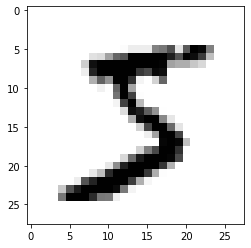

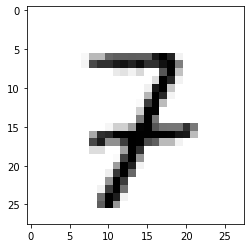

In [4]:
# %matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
imshow(dataRTraining[0].reshape(28,28), cmap='binary')
plt.show()
imshow(dataRTraining[2018].reshape(28,28), cmap='binary')
plt.show()

## Loading MNIST using Tensorflow

Now we use the tensorflow package, provided by Google, for loading the MNIST dataset. When using tensorflow there is a built-in solution for importing the MNIST dataset within the tensorflow library. This spares us the work of loading and formating the data contained in the aforementioned CSV files. Instead, we may import a data structure from the tensorflow library as:

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

When loading the data, the labels are not encoded using the one_hot option.
*One-hot* refers to the formatting style of the label vector(s) provided.
For this dataset, there are 10 possible labels corresponding to
handwritten digits between 0 and 9. Then, for labeling an image, it is
sufficient to assign an integer number between 0 and 9 corresponding to its
label. When using the aforementioned one-hot representation of the labels, every
image is labeled using a 10-dimensional vector with the value 1 in the
entry corresponding to its assigned label (i.e., the "hot" entry) and zero elsewhere. Later in this course we will 
discuss the role of the one-hot format in context of supervised learning. 

We can convert the current labels to one hot using the following package. However, note that we are doing something artificial here just to demonstrate the concept.

In [6]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

In [7]:
class DataHolder:
    def __init__(self):
        self.images = None
        self.labels = None
        
class DatasetCustom:
    def __init__(self):
        self.train = DataHolder()
        self.test = DataHolder()
        
data = DatasetCustom() 
data.train.images = X_train
data.test.images = X_test
data.train.labels = one_hot_encoder.fit_transform(Y_train[:,np.newaxis])
data.test.labels = one_hot_encoder.fit_transform(Y_test[:,np.newaxis])


Up to this point, we have extracted the **MNIST** datset, which is composed of  
* 70.000 images and associated labels.

When loading this dataset from the examples provided by the tensorflow library, these 70.000 images and lables are already partioned into two datasets: 

In [8]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))


Size of:
- Training-set:		60000
- Test-set:		10000


Each element of the dataset is an image of dimension $784=28\times 28$. 

In [9]:
print("shape of first entry:",data.train.images[0,:].shape)
print("shape of second entry:",data.train.images[1,:].shape)
print("shape of third  entry:",data.train.images[2,:].shape)

shape of first entry: (28, 28)
shape of second entry: (28, 28)
shape of third  entry: (28, 28)


As discussed, the label vectors inside "data.train.labels" are in a one-hot format. We can extract the label number (between 0 and 9) by seaching for the entry with maximum value within the one-hot vector:

In [10]:
print("label of first entry:", data.train.labels[0,:])
print("label of first entry:", data.train.labels[0,:].argmax())
print("label of second entry:", data.train.labels[1,:])
print("label of second entry:", data.train.labels[1,:].argmax())

label of first entry: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
label of first entry: 5
label of second entry: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
label of second entry: 0


We now show that this images correspond to the handritten digits as expected. 

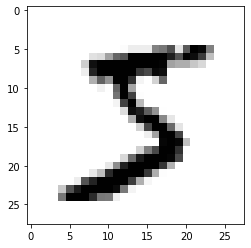

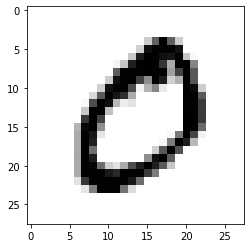

In [11]:
plt.imshow(data.train.images[0,:], cmap='binary')
plt.show()
plt.imshow(data.train.images[1,:], cmap='binary')
plt.show()

## MNIST dataset (PyTorch version)

PyTorch is a python library developed by Facebook particularly for deep learning using GPU and CPU. In this tutorial, we load the MNIST dataset. We import two libraries torch and torchvision, the later for datasets. 


In [12]:
import torch
from torchvision import datasets

MNIST dataset is loaded using the following command. There is a download flag which is set to True if the dataset is to be downloaded from the internet. If MNIST dataset for PyTorch has been downloaded, two files training.pt and test.pt are found in the folder "processed". In this case, put the flag to False so that it is not downloaded again. The flag "train" determines if you intend to load training or test set.

In [13]:
DNLD=True
trainingMNIST = datasets.MNIST('./MNIST', train=True, download=DNLD)
testMNIST = datasets.MNIST('./MNIST', train=False, download=DNLD)

The size of training and test set is the same as before. Note that the validation set should be manually constructed from the training set.

In [14]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(trainingMNIST)))
print("- Test-set:\t\t{}".format(len(testMNIST)))

Size of:
- Training-set:		60000
- Test-set:		10000


Each entry of the dataset consists of PIL image module and its label. In the following, we explore similarly the content of entries.

In [15]:
trainingMNIST[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7F66AB9DA710>, tensor(5))

In [16]:
print("shape of first entry:", trainingMNIST[0][0].size)
print("shape of second entry:", trainingMNIST[1][0].size)
print("shape of third entry:", trainingMNIST[2][0].size)

shape of first entry: (28, 28)
shape of second entry: (28, 28)
shape of third entry: (28, 28)


In [17]:
print("label of first entry:", trainingMNIST[0][1])
print("label of first entry:", trainingMNIST[1][1])
print("label of first entry:", trainingMNIST[2][1])

label of first entry: tensor(5)
label of first entry: tensor(0)
label of first entry: tensor(4)


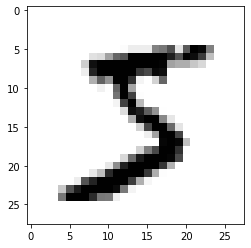

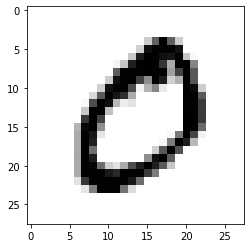

In [18]:
imshow(np.asarray(trainingMNIST[0][0]), cmap='binary')
plt.show()
imshow(np.asarray(trainingMNIST[1][0]), cmap='binary')
plt.show()